In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("balabaskar/tom-and-jerry-image-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'tom-and-jerry-image-classification' dataset.
Path to dataset files: /kaggle/input/tom-and-jerry-image-classification


In [2]:
import os

path = "/kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry"

os.listdir(path)

['tom_jerry_1', 'jerry', 'tom', 'tom_jerry_0']

In [3]:
for dirpath, dirname, filename in os.walk(path):
  print(f'There are {len(dirname)} directories and {len(filename)} in {dirpath} ')

There are 4 directories and 0 in /kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry 
There are 0 directories and 780 in /kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom_jerry_1 
There are 0 directories and 1240 in /kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/jerry 
There are 0 directories and 1930 in /kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom 
There are 0 directories and 1528 in /kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom_jerry_0 


In [4]:
import pathlib
import numpy as np

data_dir = pathlib.Path(path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['jerry' 'tom' 'tom_jerry_0' 'tom_jerry_1']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_randomImage(dir_path, choice):
  targert_dir = os.path.join(dir_path, choice)
  random_img = random.sample(os.listdir(targert_dir),1)
  img = mpimg.imread(os.path.join(targert_dir, random_img[0]))

  plt.imshow(img)
  plt.title(f'Class: {choice}')
  plt.axis(False)
  plt.show()

In [6]:
x = random.choice(class_names)
print(x)

tom_jerry_0


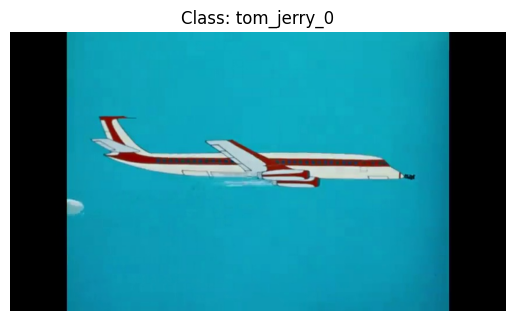

In [7]:
dir_path = path

view_randomImage(dir_path=dir_path, choice=random.choice(class_names))


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

In [9]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.5,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2,
                                   horizontal_flip=True)

# Training generator
train_data = train_datagen.flow_from_directory(
    dir_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=SEED
)

# Validation generator
val_data = train_datagen.flow_from_directory(
    dir_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=SEED
)

Found 4383 images belonging to 4 classes.
Found 1095 images belonging to 4 classes.


In [10]:
def plot_curvers(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense, Flatten, MaxPooling2D, BatchNormalization

In [ ]:
tf.random.set_seed(42)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(),
    Conv2D(48, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='softmax')

])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_data, epochs=15, steps_per_epoch=len(train_data), validation_data=val_data, validation_steps=len(val_data))

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 92s 615ms/step - accuracy: 0.3252 - loss: 1.3554 - val_accuracy: 0.3662 - val_loss: 1.3329
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 563ms/step - accuracy: 0.3781 - loss: 1.3180 - val_accuracy: 0.3534 - val_loss: 1.3406
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 76s 556ms/step - accuracy: 0.3917 - loss: 1.3054 - val_accuracy: 0.3991 - val_loss: 1.2781
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 563ms/step - accuracy: 0.4323 - loss: 1.2324 - val_accuracy: 0.4265 - val_loss: 1.1805
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 79s 575ms/step - accuracy: 0.5496 - loss: 1.0158 - val_accuracy: 0.5233 - val_loss: 1.0481
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 79s 578ms/step - accuracy: 0.5867 - loss: 0.9107 - val_accuracy: 0.6237 - val_loss: 0.8319
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 79s 578ms/step - accuracy: 0.6390 - loss: 0.8246 - val_accuracy: 0.6009 - val_loss: 0.8511
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 80s 583ms/step - accuracy: 0.6621 - loss: 0

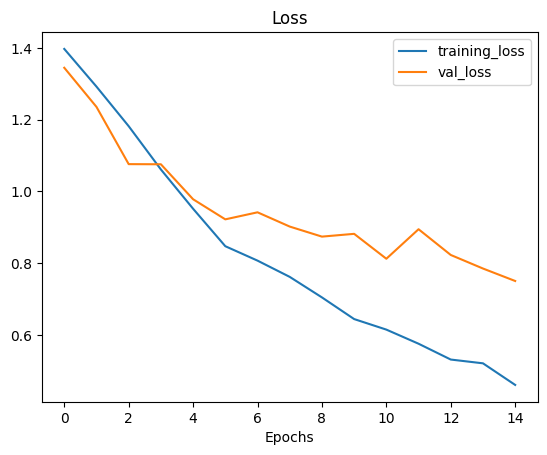

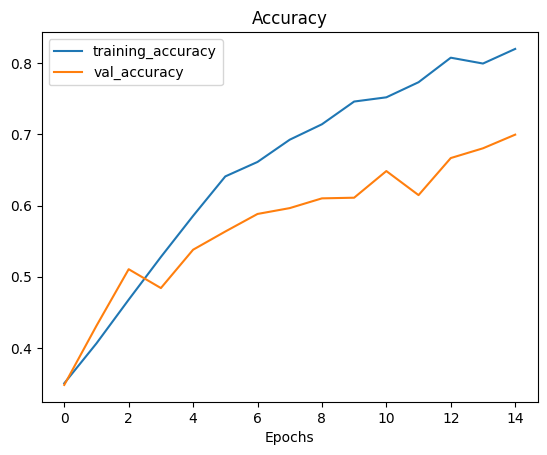

In [ ]:
plot_curvers(model.history)

In [17]:
tf.random.set_seed(42)

model2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(),
    Conv2D(48, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    # Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.fit(train_data, epochs=25, steps_per_epoch=len(train_data), validation_data=val_data, validation_steps=len(val_data))

Epoch 1/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 85s 588ms/step - accuracy: 0.3208 - loss: 1.3627 - val_accuracy: 0.3434 - val_loss: 1.3349
Epoch 2/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 78s 571ms/step - accuracy: 0.3816 - loss: 1.3100 - val_accuracy: 0.4347 - val_loss: 1.2495
Epoch 3/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 562ms/step - accuracy: 0.4497 - loss: 1.2275 - val_accuracy: 0.5096 - val_loss: 1.0154
Epoch 4/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 76s 559ms/step - accuracy: 0.5284 - loss: 1.0379 - val_accuracy: 0.5553 - val_loss: 0.9245
Epoch 5/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 565ms/step - accuracy: 0.5641 - loss: 0.9605 - val_accuracy: 0.5900 - val_loss: 0.8733
Epoch 6/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 562ms/step - accuracy: 0.5830 - loss: 0.9207 - val_accuracy: 0.5936 - val_loss: 0.8393
Epoch 7/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 76s 557ms/step - accuracy: 0.6021 - loss: 0.8568 - val_accuracy: 0.5689 - val_loss: 0.8847
Epoch 8/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 562ms/step - accuracy: 0.5948 - loss: 0

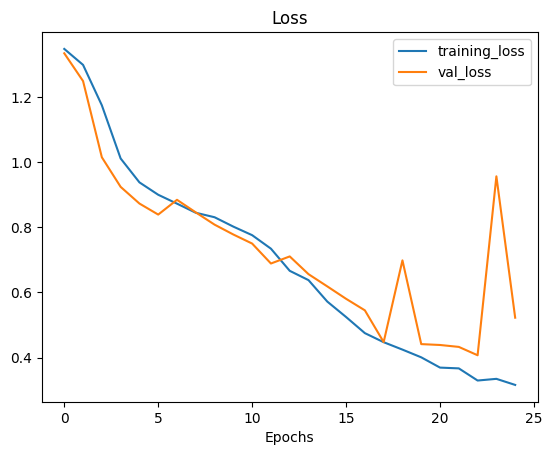

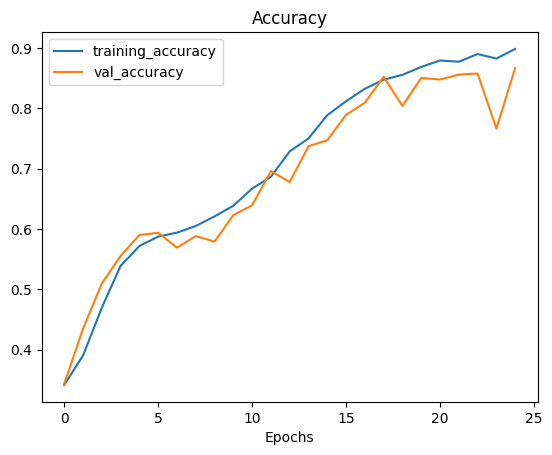

In [18]:
plot_curvers(model2.history)

In [19]:
model2.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=len(val_data)
)


Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 76s 559ms/step - accuracy: 0.8980 - loss: 0.3066 - val_accuracy: 0.8575 - val_loss: 0.4176
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 76s 553ms/step - accuracy: 0.8959 - loss: 0.3110 - val_accuracy: 0.8740 - val_loss: 0.4093
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 82s 551ms/step - accuracy: 0.9075 - loss: 0.2870 - val_accuracy: 0.8667 - val_loss: 0.5100
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 559ms/step - accuracy: 0.9176 - loss: 0.2492 - val_accuracy: 0.8840 - val_loss: 0.3981
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 76s 552ms/step - accuracy: 0.9242 - loss: 0.2340 - val_accuracy: 0.8594 - val_loss: 0.5826
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 75s 550ms/step - accuracy: 0.9110 - loss: 0.2985 - val_accuracy: 0.8484 - val_loss: 0.6021
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 76s 558ms/step - accuracy: 0.9196 - loss: 0.2435 - val_accuracy: 0.8904 - val_loss: 0.4045
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 566ms/step - accuracy: 0.9112 - loss: 0

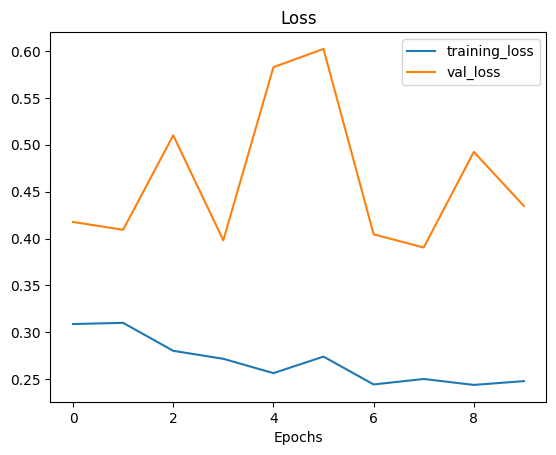

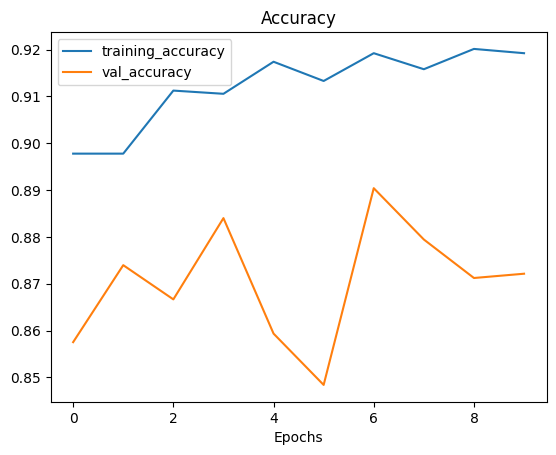

In [54]:
plot_curvers(model2.history)

In [20]:
model2.save("model2_epoch33.h5")

In [24]:
from google.colab import files
files.download("model2_epoch33.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
from keras.models import load_model
model = load_model("/content/model2_epoch33.h5")

In [58]:
def get_predicting_class(model, image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224,224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, 0)
    img_array = img_array / 255.0

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    plt.imshow(img)
    plt.title(f'Prediction: {predicted_class}, Confidence: {confidence}%')
    plt.axis('off')
    plt.show()

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


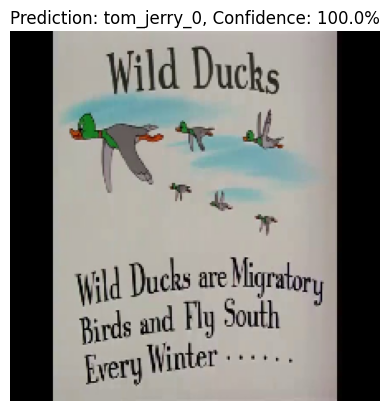

(np.str_('tom_jerry_0'), np.float32(100.0))

In [64]:
get_predicting_class(model, "/kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom_jerry_0/frame3145.jpg")

In [61]:
os.listdir('/kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom_jerry_0')[0:10]

['frame2378.jpg',
 'frame5305.jpg',
 'frame1416.jpg',
 'frame3145.jpg',
 'frame3952.jpg',
 'frame2329.jpg',
 'frame5076.jpg',
 'frame4270.jpg',
 'frame2474.jpg',
 'frame91.jpg']

In [75]:
!wget https://i.ytimg.com/vi/t0Q2otsqC4I/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLBgbkdHwq9v7C3DObsH54uBSf8hiw

--2025-12-24 17:10:21--  https://i.ytimg.com/vi/t0Q2otsqC4I/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD
Resolving i.ytimg.com (i.ytimg.com)... 142.251.2.119, 74.125.137.119, 142.250.141.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|142.251.2.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73702 (72K) [image/jpeg]
Saving to: ‘hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD’

hq720.jpg?sqp=-oaym 100%[===================>]  71.97K  --.-KB/s    in 0.001s  

2025-12-24 17:10:21 (136 MB/s) - ‘hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD’ saved [73702/73702]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


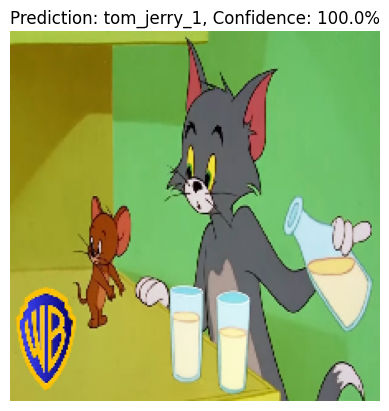

In [76]:
get_predicting_class(model, "/content/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD");

In [82]:
!wget https://i.ytimg.com/vi/hyQHoyp2Ulg/maxresdefault.jpg

--2025-12-24 17:14:54--  https://i.ytimg.com/vi/hyQHoyp2Ulg/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 142.250.141.119, 142.250.101.119, 142.251.2.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|142.250.141.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88840 (87K) [image/jpeg]
Saving to: ‘maxresdefault.jpg’

maxresdefault.jpg   100%[===================>]  86.76K  --.-KB/s    in 0.001s  

2025-12-24 17:14:54 (120 MB/s) - ‘maxresdefault.jpg’ saved [88840/88840]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


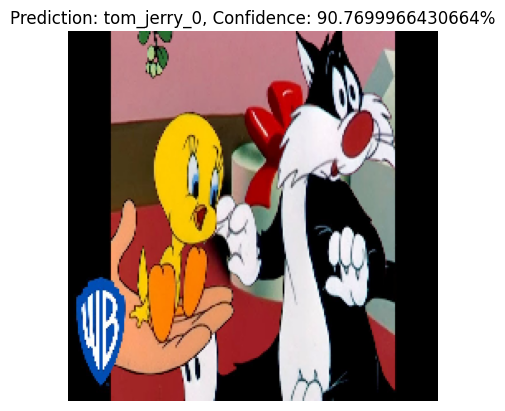

In [83]:
get_predicting_class(model, "/content/maxresdefault.jpg");

In [86]:
!wget https://i.ytimg.com/vi/yFR7qFOe9bk/maxresdefault.jpg

--2025-12-24 17:18:04--  https://i.ytimg.com/vi/yFR7qFOe9bk/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 142.250.101.119, 142.251.2.119, 74.125.137.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|142.250.101.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126833 (124K) [image/jpeg]
Saving to: ‘maxresdefault.jpg’

maxresdefault.jpg   100%[===================>] 123.86K  --.-KB/s    in 0.001s  

2025-12-24 17:18:04 (159 MB/s) - ‘maxresdefault.jpg’ saved [126833/126833]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


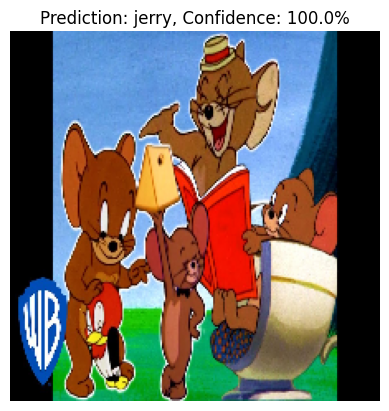

In [87]:
get_predicting_class(model, "/content/maxresdefault.jpg");

In [94]:
!wget https://i.pinimg.com/736x/b6/78/03/b67803378ba3c26bfc4b7168d5b3e5ad.jpg

--2025-12-24 17:23:17--  https://i.pinimg.com/736x/b6/78/03/b67803378ba3c26bfc4b7168d5b3e5ad.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.0.84, 151.101.64.84, 151.101.128.84, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.0.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34902 (34K) [image/jpeg]
Saving to: ‘b67803378ba3c26bfc4b7168d5b3e5ad.jpg.1’

b67803378ba3c26bfc4 100%[===================>]  34.08K  --.-KB/s    in 0.001s  

2025-12-24 17:23:17 (27.0 MB/s) - ‘b67803378ba3c26bfc4b7168d5b3e5ad.jpg.1’ saved [34902/34902]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


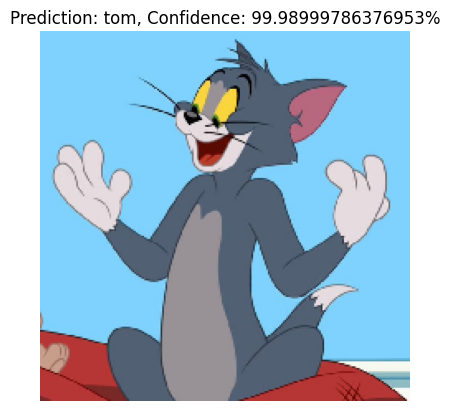

In [95]:
get_predicting_class(model, "/content/b67803378ba3c26bfc4b7168d5b3e5ad.jpg.1");